# Predicting AirBnb Review Scores

This notebook will be using the listings.csv dataset from the AirBnb Seattle dataset on Kaggle.

## Business Understanding

### Business objectives

We are imagining that we are customer experience analysts at AirBnb Seattle. Our role is to monitor local trends and gain strategic insight on the customer experience of the AirBnb platform within this city.

The aim is to **find any way to improve the customer experience**. It may not be necessary to improve the customer experience in the entire city of Seattle, but improving it in some way, be that through promotional offers or implementing new features is the primary goal.

It is also worth noting that the "customer" refers to anyone using the platform. Platform users can either take the role of guests or hosts. It is important to remember that both groups should be having an overall positive experience of the AirBnb platform in order for the platform to thrive.

It has been decided for this project to focus on **finding ways that hosts can improve the guests' experiences**.

#### Key persons and their roles

For this project, we are considering the following persons:

* Us customer experience data analysts
* The Analytics manager
* The Strategy department leads

The customer experience analysts are positioned within the Analytics team, and their full time role is to find opportunities for improvement of customer experience within the AirBnb Seattle platform. They are tasked with producing both the detailed Jupyter notebook, as well as persuasive articles for the business.

The Analytics manager is the person who will receive and digest the analysis and its conclusions. They will be quite literate in statistical and AI methods, so this **Jupyter notebook** would be good for them to study in order to check the accuracy and validity of the methods used. 

The Analytics manager is also close to the business side with many stakeholders within the business with whom they have regular meetings in order to promote their insights and put into effect adequate strategies.

One of the stakeholders would be the Strategy department leads whose job it is to assess incoming insights, consolidate them into business strategies and allocate resources to fulfill them. It is important to make the analysis clear and persuasive to them from a business standpoint, which is where the **Medium** article will come in useful.

#### Business units impacted by the project

As already alluded to, this analysis and its output will impact:

* **Customer Experience subteam of the Analytics Department** due to these being the people doing the research. The success criteria for these guys will be to produce statistically sound analysis and to have their analysis be accepted for consideration by the Strategy department
* **Analytics Department leads** due to this being the department that produces the analysis and collaborates among themselves and with the Strategy department to refine the analysis and distill key points for the business. The success criteria for the Analytics Department leads would be to reach a consensus on the business need for the insight required with the Strategy Department, as well as ensuring that the analysis produced is valid and accurate.
* **Strategy Department** due to them being the receivers of the key insights produced by the Analytics Department. They will be the people actually converting the insights into strategies which will then lead to changes in the product or platform. The success criteria for them is to collaborate with the Analytics Department leads to produce an effective strategy that is adopted and succeeds in the wild.


### Data mining goals

The business setting is that AirBnb would like to understand better the customer experience that guests have in the Seattle region. Furthering that, finding any way to associate the experience to things that hosts can change would be advantageous to answering our main business goal.

A large part of this would be to find a good way to measure customer experience or customer satisfaction. Since AirBnb is a platform where hosts can post listings which guests then visit, I would like to take the "customer" as the guest, and their experience would be related to how well they rated the experience using the provided rating mechanisms in the website or app. Any customer experience metric derived should take this rating mechanism into account.

We are assuming that we only have access to the listings CSV file and the data contained within it, which is supposed to tell us about each of the AirBnb listings in Seattle. Using this dataset, we should understand what data is available to us, and how to transform it into a dataset that can be used to link customer experience to the various listing attributes. A large part of this will involve applying transformations to the data, and dealing with missing data.

The aim is to see what AirBnb hosts can do to most likely improve the guest experience on the AirBnb platform. We can extend our understanding of how customer experience is linked to listing attributes, to understand what AirBnb hosts can easily do to improve the guests' experience.

To summarise, **translating our business goals into data mining goals**, we have:
1. Can we find an appropriate metric for understanding the quality of guests' experience?
2. How can we link listing attributes with the customer experiences?
3. What aspects of the listings can hosts easily alter to substantially boost the guest's experience?

#### Data mining problem type

In order to answer the first data mining question regarding finding an appropriate customer experience metric, we will need to perform **exploratory analysis** on candidates for a response variable.

This process will involve **description** and plotting of variables and utilising business understanding (e.g. that variables related to the built in rating mechanism of the AirBnb platform will be useful) to select an appropriate metric.

Solving the second data mining question involves most likely a **regression** problem, since if we end up with a continuous response variable, we would like to accurately predict this using the available and appropriate data. However, if we end up selecting a binary or discrete response variable, this could turn into a classification problem. Since reviews are given generally on a line from 0-100, it's most likely that the second data mining question will be resolved using regression.

Further challenges with the second problem will be selecting appropriate features, transforming variables and engineering and/or replacing features. Empty, invalid and outlier values will need to be considered. This process is likely to take some time.

The third data mining question will become a **feature importance** problem. If the second question is solved using a regression problem, then most likely this will utilize the coefficients of the model in order to ascertain which features contribute the most to the response variable, i.e. the customer experience. We will then select those features that the hosts directly control which have a large magnitude coefficient, since these are most likely to have a positive or negative effect on customer experience.

#### Criteria for model assessment

We will be evaluating our results/model against tests in order to be satisfied with its validity.

For the first data mining problem, we will visualise the distributions of the response variable candidates in order to ascertain which of them have reasonable distributions that could conceivably produce stable output when using as a response variable for modelling.

We will also need to ensure that the metric chosen will satisfy the business requirements for being an adequate representation of customer experience, and that it is not just chosen solely to produce good results from the model.

Finally, we may want to narrow the scope of the project. We are only looking to improve guests' customer experience, and this could be limited to certain subsets of the user base. It is worth bearing in mind that this is just one project within an entire team's ongoing roadmap. As long as the user base chosen is large enough for potential insights to be significant, then this will contribute towards satisfying our business goals.

For the second data mining problem, we will use cross validation to evaluate candidates for modelling the data. We will evaluate using the R2 score and the RMSE if using regression. We could also plot residuals of the model to evaluate skew.

The third data mining problem will follow from the solution of the second data mining problem. We can apply a properly evaluated model on the data in order to assess the feature importance. We will ensure that the features chosen from the feature importance are appropriate for using in a strategy that could conceivably target hosts and how they could improve the guests' experiences.

#### Project plan

Boiling down the above into a plan, we have:

* Make initial steps to understand and explore the data availble.
* Perform exploratory and descriptive analysis in order to find an appropriate response variable related to customer experience
* Based on whether the response variable is continous or discrete either frame a regression or classification problem for predicting this response variable.
* Clean and tidy the data set in order to prepare it for modelling.
* Select candidate algorithms for modelling the data and evaluate them, utilizing cross-validation.
* Use the prediction model to ascertain the most important aspects that hosts can improve guests' experience.
* Distill (deploy) the results as key points that a non-technical business audience could understand.

## Data Understanding

We need to look at the data available to us in the listings CSV file, in order to gain understanding of the data.

### Column names

Let's start with reading in the file and listing out the columns available to us.

In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
l = pd.read_csv('../input/seattle/listings.csv')

l.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

These are our column names.

Based on just the column naming, we appear to have several **review-based datapoints** such as the review_scores_X columns, as well as reviews_per_month, first/last_review and number_of_reviews. These columns should come in useful later when we look at our first business question "Can we find an appropriate metric for understanding the quality of guests' experience?"

We have a wide variety of columns related to **attributes of the property listed**, such as bedrooms, bathrooms, beds, amenities, property_type and room_type. From a business perspective, these have varying degrees of control from the host. For example, number of beds could conceivably be changed by the host if there is enough room, but property_type will most likely be out of the host's control. Regardless, these property-centric data points could be useful for answering business question 2, and some of them for business question 3.

There seem to be some columns related to the **geolocation** of the listing, such as neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, zipcode, latitude and longitude. We obviously don't require using any geolocation datapoints on the city level resolution or above, such as country , since we are just looking at data in Seattle. It's widely known that there are certain areas in cities that are more popular than others. It's possible that certain neighbourhoods would be attractive to a specific subset of the AirBnb guests. We could therefore use this geolocation information to frame our business questions more precisely.

There are also columns seeming to relate to the **policies** set by the host, such as price, weekly_price, security_deposit, minimum_nights and maximum_nights. These are properties from a business perspective would be directly controlled and easily set by the user, and we should try to include as many of these features as possible in our analysis. These properties should be helpful for business questions 2 and 3.

There seem to be some **descriptive** fields regarding the ad and its relation to the listed property. These could be: name, summary, space and description, for example. It is difficult to say at this stage how useful these columns would be.

There are also some columns referencing **attributes of the host**, such as host_name, host_about, host_location, host_response_time. Some of these attributes can be controlled by the host, such as host_response_time and host_location, however others such as host_name are not so easily changed. Some of these features could be useful for answering business questions 2 and 3.

There are some columns related to the listing **availablilty**, such as has_availability and availability_30. I'm not sure how useful these columns would be in relation to our business questions regarding guest customer experience and what the host can do about it.

There are several **ID and system** fields such as id, listing_url, scrape_id, last_scraped and xl_picture_url. Since we are just focussing on this listings CSV and not pulling in other data sources, it's probable that we will only need an ID for each record, and not need the other ID fields. Using any of the ID fields could be misleading as they represent the system's way of storing the data and not actual data on the listings themselves.

### Basic properties of the data

It's important to know what the "size" of the data is. The CSV file has 3,818 rows and 92 columns, shown by the below output.

In [114]:
l.shape

(3818, 92)

Let's see what datatypes are available in the data.

In [115]:
l.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

We have 62 columns of type "object", which can refer to anything that is not numeric or date, such as a string. Also there are 17 "float64" columns, i.e. floating point numerical columns. Finally there are 13 "int64" or integer columns.

Let's take a look at the top 5 rows of the data.

In [116]:
l.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


There are too many columns to print out, however we can see that there are some long descriptive text columns such as name, summary, space, description and neighborhood_overview. Descriptive text data is difficult to extract insight from as it is relying on a computer understanding a human language. We could spend extra effort implementing NLP to build more features from these columns, but it may not be worthwhile.

We can see that many columns appear to be a boolean type, such as requires_licence, instant_bookable, require_guest_profile_picture and require_guest_phone_verification. These would be easy to encode into 1s and 0s in order to implement into a training dataset.

There are some date columns such as last_scraped. These are currently stored as the "object" type, but they are in fact dates. The last_scraped column is a system column, so we should not use it for this analysis, but we should watch out for date columns that could be used to create features from.

### Properties of feature groups

Let's list out all the columns for each feature group, and explore the data available in the group.

#### Review-based datapoints

* number_of_reviews
* first_review
* last_review
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value
* reviews_per_month

In [117]:
cols = ['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
       'review_scores_location', 'review_scores_value', 'reviews_per_month']
l[cols].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


All columns except number_of_reviews have missing values (since there are 3818 rows in total). The maximum value of number_of_reviews is 474 which is way higher than the mean of 22.2, or the median of 9. The maximum values for all review_scores_ columns is 10.0 with the smallest value of 2.0 across the columns. 

The standard deviation of the review_scores_rating column at 6.61 is much higher than most other review_scores_ columns.

The range of reviews_per_month is a lot smaller than number_of_reviews, with the maximum reviews_per_month at 12.15 compared with the maxium number_of_reviews at 474. This is most likely due to the unbounded time period for which number_of_reviews can be measured, whereas the reviews_per_month is measured over a consistent time period, i.e. a month.

I would guess that the review_scores_rating column is calculated using some combination of the other review_scores_ columns. Let's see how they correlate with each other.

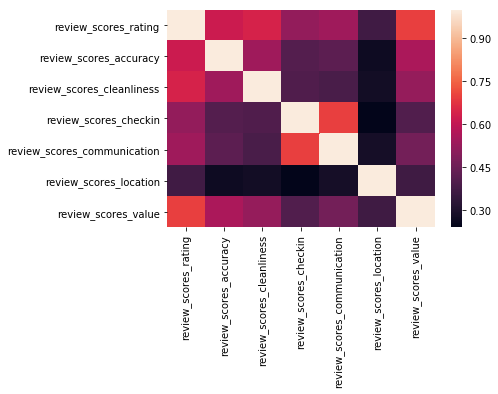

In [118]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value']
df = l[cols]

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Although the colour scheme in the above heatmap is quite dramatic, we can see that all the correlations are positive. We can see that many columns correlate strongly with review_scores_rating, except for especially review_scores_location. The columns review_scores_checkin and review_scores_communication are also highly correlated.

These columns are useful for answering our first data mining question: 
* *Can we find an appropriate metric for understanding the quality of guests' experience?*
   
   
Since review_scores_rating is probably the main column used for assessing the quality of guests' stays, we will first consider this variable for our customer experience metric.

We have established that 3,171 out of 3,818 values are not empty for this column, which is a fill rate of 83%. This is not too high, but given that this is such a direct path to customer experience, this is necessary for us to consider.

Let's look at the distribution of values of this column with a histogram plot.

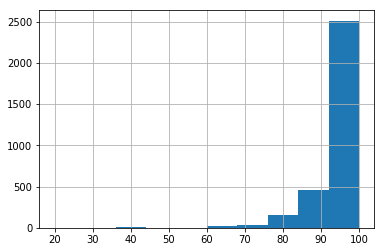

In [119]:
l['review_scores_rating'].hist()

We have quite a heavily skewed distribution towards the maximum value of 100. This makes some sense as people will generally want to give nice reviews and are unlikely to give harsh ones unless there is a good reason to do so. Also, hosts would want to keep their review rating as high as possible as this is a beneficial advertisement draw for guests.

Let's look at the top 5 rows of the other review based columns.

In [120]:
cols = ['number_of_reviews', 'first_review', 'last_review', 'reviews_per_month']
l[cols].head()

,number_of_reviews,first_review,last_review,reviews_per_month
0,207,2011-11-01,2016-01-02,4.07
1,43,2013-08-19,2015-12-29,1.48
2,20,2014-07-30,2015-09-03,1.15
3,0,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,0.89


We have the total number of reviews made for a listing, the dates corresponding to the first time a review was made, and the last time a review was made, and the calculated reviews per month.

Let's look at histograms of number_of_reviews and reviews_per_month

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c14076d8>,
      dtype=object)

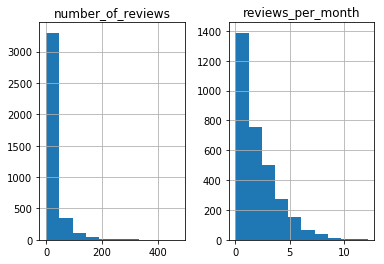

In [121]:
l[['number_of_reviews', 'reviews_per_month']].hist()

The number_of_reviews distribution is mostly contained within a relatively small range compared to the overall range of values, whereas the reviews_per_month distribution is more uniformly contained within a much smaller range.

From a business standpoint, I am more interesed in the reviews_per_month metric as opposed to the number_of_reviews, since hosts can have a higher number of reviews just by being active for a longer time, and thus any strategy that targets boosting number of reviews would be biased towards more established hosts. Using reviews_per_month on the other hand would be applicable to all hosts. Also, a high number of reviews per month could contribute to the "magnitude" of the customer experience.

##### Combining metrics to find an appropriate response variable

From analysing the review-based features, two features in particular have stood out as good ingredients for a customer experience metric:

* review_scores_rating
* reviews_per_month

These two metrics from a business perspective represent two different aspects of customer experience: the review score reflects the quality of the guest's stay (i.e. how "good" or "bad" it was), and the reviews per month reflects how many customers' experiences were affected. Both are important for understanding the experience.

However, since we are opting for just one response variable in this data science problem, we must try to find a way to "blend" these metrics together to reward essentially "a large number of good user experiences". This is attempted below by simply multiplying the two metrics together (after having converted the review score to a decimal from 0-1).

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c13aa710>,
      dtype=object)

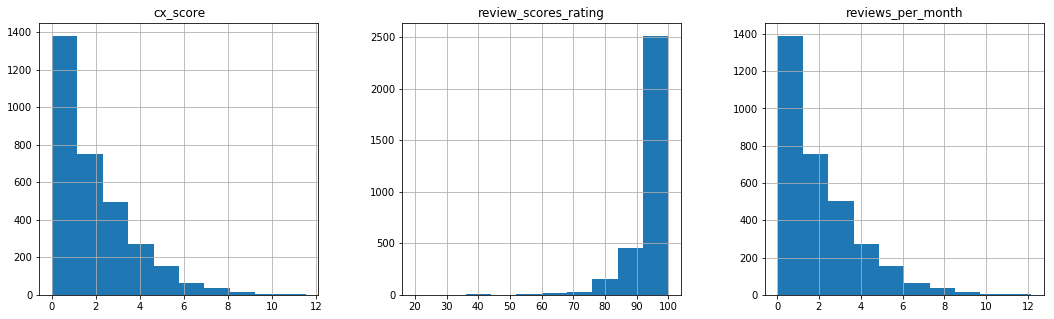

In [122]:
df = l[['review_scores_rating', 'reviews_per_month']].copy()

df['cx_score'] = df['review_scores_rating'] / 100 * df['reviews_per_month']

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (18,5))
ax = fig.gca()
df.hist(layout=(1,3), ax=ax)

We can see that the cx_score distribution is very similar in shape to the reviews_per_month distribution. This would appear to be because most of the review_scores_rating values are close to 100, which would mean a multiplicative factor of almost 1.0 to most reviews_per_month values.

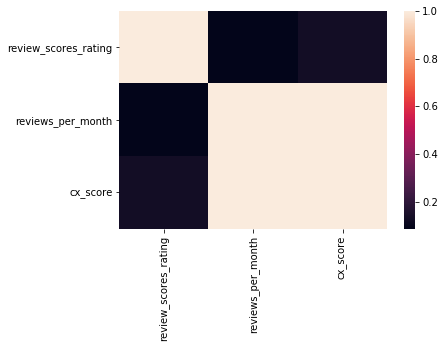

In [123]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

The close similiarity between cx_score and reviews_per_month, contrasted with the low correlation with these variables and review_scores_rating, is demonstrated by the above correlation matrix.

This in effect reduces the influence of review_scores_rating as opposed to the reviews_per_month. I am considering this to be OK because this essentially means we are mainly considering the "velocity of good reviews" as the CX score. It just so happens that there aren't that many "bad" reviews in the dataset.

To summarise, after studying the review-based features, we have decided on a **response variable for CX score consisting of multiplying the scaled review_scores_rating with reviews_per_month**

#### Attributes of property listed

* property_type
* room_type
* accommodates
* bathrooms
* bedrooms
* beds
* bed_type
* amenities
* square_feet

The remainder of the data understanding will largely be attributed towards understanding our second data mining goal, which is to assess how listing attributes are linked with the customer experiences. We will continue through the feature groups, with this sub-section studying the property attribute features.

In [124]:
cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
l[cols].head()

,property_type,room_type,accommodates,bathrooms,beds,bed_type,amenities,square_feet
0,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
2,House,Entire home/apt,11,4.5,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3,Apartment,Entire home/apt,3,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN
4,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN


The property_type, room_type and bed_type columns are categorical variables describing what kind of property, room and bed the listing contains.

In [125]:
l['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

We have 3 groups of property type with more than 100 values: House, Apartment and Townhouse. The rest could be considered as more obscure property types.

In [126]:
l['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

The room_type column has fewer unique values and would not need further grouping. It makes sense that the majority of the listings would be for the entire place.

In [127]:
l['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

The vast majority of beds are of the "Real Bed" type, with a small number of other less luxurious types on offer.

In [128]:
cols = ['accommodates', 'bathrooms', 'beds', 'square_feet']
l[cols].describe()

,accommodates,bathrooms,beds,square_feet
count,3818.000000,3802.000000,3817.000000,97.000000
mean,3.349398,1.259469,1.735394,854.618557
std,1.977599,0.590369,1.139480,671.404893
min,1.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,420.000000
50%,3.000000,1.000000,1.000000,750.000000
75%,4.000000,1.000000,2.000000,1200.000000
max,16.000000,8.000000,15.000000,3000.000000


The accommodates, bathrooms and bathrooms columns have very few missing values. On the other hand, square_feet is barely populated at all and has a much larger standard deviation and range.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c110a0b8>,
      dtype=object)

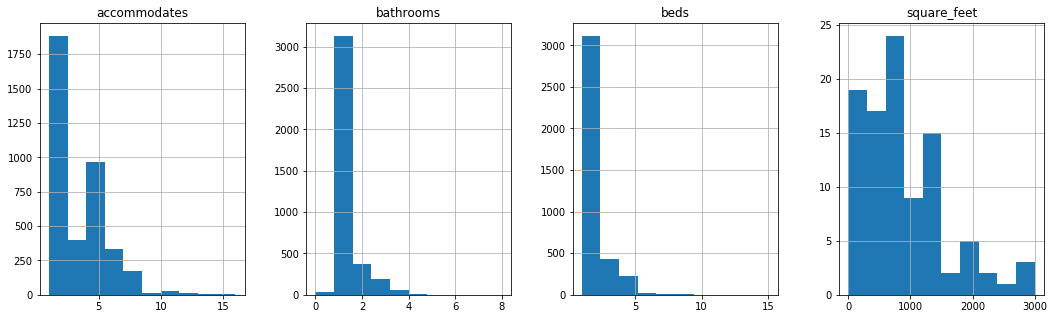

In [129]:
fig = plt.figure(figsize = (18,5))
ax = fig.gca()
l[cols].hist(layout=(1,4), ax=ax)

From the above data, we can see that the median sits at 1 bed and one bathroom, accomodating 3 people. The vast majority of listings have just 1 bathroom, and 1-2 beds.

In [130]:
l['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

The amenities column is more complicated, where each value consists of a list of tags which take a fixed number of possibilities.

In [131]:
cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
l[cols].isnull().sum()

property_type       1
room_type           0
accommodates        0
bathrooms          16
beds                1
bed_type            0
amenities           0
square_feet      3721
dtype: int64

Looking at missing values, we see most of our columns have very few, with the exception of square_feet.

#### Geolocation

* street
* neighbourhood
* neighbourhood_cleansed
* neighbourhood_group_cleansed
* city
* state
* zipcode
* market
* smart_location
* country_code
* country
* latitude
* longitude
* is_location_exact
* jurisdiction_names

In [132]:
cols = ['street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'jurisdiction_names']
l[cols].head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,jurisdiction_names
0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,WASHINGTON
1,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,WASHINGTON
2,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,WASHINGTON
3,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,WASHINGTON
4,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,WASHINGTON


The street column is a text based string indicating the street that the listing is on. Naturally this column will have high cardinality and may not be very useful to us since it is too detailed and complex to analyse.

We have 3 neighbourhood columns: neighbourhood, neighbourhood_cleansed and neighbourhood_group_cleansed. It would seem from the naming that neighbourhood_cleansed is a normalised version of the neighbourhood column, and the neighbourhood_group_cleansed column is a further grouping of the neighbourhood_cleansed column. Let's describe these columns to ascertain whether this may be the case.

In [133]:
l['neighbourhood'].value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Park              2
South Beacon Hill       2
North College Park      1
Roxhill                 1
Fairmount Park          1
Name: neighbourhood, Length: 81, dtype: int64

In [134]:
l['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

There is a definite difference between these groupings. The smallest groups in neighbourhood are of size 1, whereas the smallest group in neighbourhood_cleansed is size 2. The top 5 groups of each have significant differences in naming and allocation of groups. There are however more distinct values for neighbourhood_cleansed than neighbourhood. This suggests that the groups for neighbourhood_cleansed are more uniform.

In [135]:
l['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

There are much fewer groups in neighbourhood_group_cleansed than the other neighbourhood columns, which points toward our guess that the neighbourhood_group_cleansed column is a higher level of the hierarchy.

In [136]:
cols = ['city', 'state', 'market', 'country_code', 'country', 'jurisdiction_names']
l[cols].head()

,city,state,market,country_code,country,jurisdiction_names
0,Seattle,WA,Seattle,US,United States,WASHINGTON
1,Seattle,WA,Seattle,US,United States,WASHINGTON
2,Seattle,WA,Seattle,US,United States,WASHINGTON
3,Seattle,WA,Seattle,US,United States,WASHINGTON
4,Seattle,WA,Seattle,US,United States,WASHINGTON


It's quite clear that the above columns are going to be quite useless when analysing data for just Seattle as they are of equal or lower granularity than the dataset.

In [137]:
l['zipcode'].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

There are many distinct values for zipcode, as it is of a similar granularity as street from a business perspective. There looks to be at least one badly entered value, e.g. '99\n98122', which indicates that this column would need initial quality cleaning before analysing.

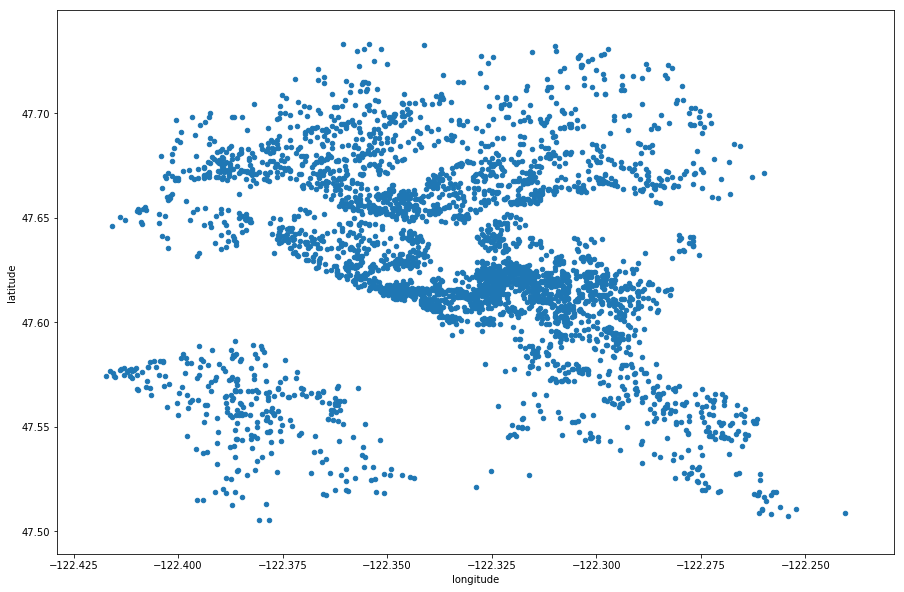

In [138]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
l.plot.scatter('longitude', 'latitude', ax=ax)

There appears to be a high density of (lat,lng) values in the centre, and 2 main clusters of points - one much smaller to the bottom left.

In [139]:
l['is_location_exact'].value_counts()

t    3412
f     406
Name: is_location_exact, dtype: int64

The majority of listings have is_location_exact set to 't' or the equivalent boolean value of True.

#### Policies

* price
* weekly_price
* monthly_price
* security_deposit
* cleaning_fee
* guests_included
* extra_people
* minimum_nights
* maximum_nights
* requires_license
* license
* instant_bookable
* require_guest_profile_picture
* require_guest_phone_verification
* cancellation_policy

I have gathered these features together into the Policies feature group due to business understanding. These features all represent some kind of policy that the host has on the listing.

In [140]:
cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'requires_license', 'license',
       'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'cancellation_policy']
l[cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,requires_license,license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy
0,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,f,NaN,f,f,f,moderate
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,f,NaN,f,t,t,strict
2,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,f,NaN,f,f,f,strict
3,$100.00,$650.00,"$2,300.00",NaN,NaN,1,$0.00,1,1125,f,NaN,f,f,f,flexible
4,$450.00,NaN,NaN,$700.00,$125.00,6,$15.00,1,1125,f,NaN,f,f,f,strict


We have the following money-based columns: price, weekly_price, security_deposit, cleaning_fee, extra_people.

Also there are some integer columns: guests_included, minimum_nights, maximum_nights.

We have the boolean columns: requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification.

There is a categorical column cancellation_policy.

It is unclear at this stage which datatype license has.

In [141]:
l[cols].isnull().sum() / l.shape[0]

price                               0.000000
weekly_price                        0.473808
monthly_price                       0.602672
security_deposit                    0.511262
cleaning_fee                        0.269775
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
requires_license                    0.000000
license                             1.000000
instant_bookable                    0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
cancellation_policy                 0.000000
dtype: float64

The license column is completely empty. Around half of weekly_price and security_deposit are empty, and 60% of monthly price is empty. Cleaning fee is 27% empty.

The other policy columns have no null values at all.

In [142]:
cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights']
df = l[cols].copy()

# Convert the money columns into floats
dollar_to_float = lambda x: x.replace('[\$,]', '', regex=True).astype(float)
money_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

# Apply the function to the money cols
df[money_cols] = df[money_cols].apply(dollar_to_float, axis=1)

df.describe()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
count,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617
std,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007
min,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000
25%,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000
50%,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000
75%,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000
max,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000


Treating the money columns as floats, we can get descriptive information on the distributions of the numeric columns.

We can see that the average price is 127, the median guests_included is 1 and 75% of listings have just 1 or 2 minimum nights.

Maximum nights has some extremely high values.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c3dd4f98>,
      dtype=object)

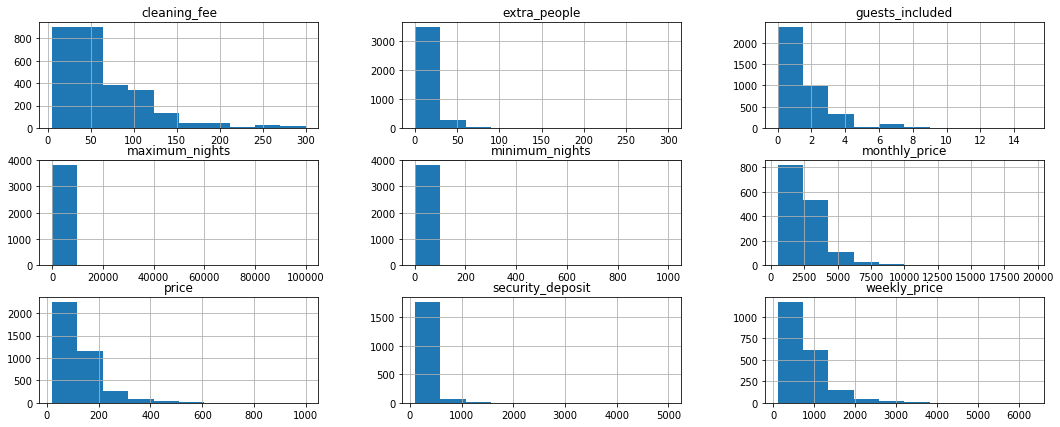

In [143]:
fig = plt.figure(figsize = (18,7))
ax = fig.gca()
df.hist(ax=ax)

Excluding or replacing extremely high values from these data points may be a worthwhile exercise.

In [144]:
l['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

There are 3 categories to the cancellation_policy field, and they appear to be balanced groups.

#### Descriptive

* name
* summary
* space
* description
* experiences_offered
* neighborhood_overview
* notes
* transit

In [145]:
cols = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit']
l[cols].head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...


The descriptive columns are mostly made up of free text, or what appears to be auto-generated text, with the exception of experiences, which has a fixed value 'none' for the first 5 values.

In [146]:
l['experiences_offered'].value_counts()

none    3818
Name: experiences_offered, dtype: int64

In fact, all values of experiences_offered are 'none'.

Let's see how many values are null in each of the columns.

In [147]:
l[cols].isnull().sum() / l.shape[0]

name                     0.000000
summary                  0.046359
space                    0.149031
description              0.000000
experiences_offered      0.000000
neighborhood_overview    0.270299
notes                    0.420639
transit                  0.244631
dtype: float64

All listings have a name and description. 4% of listings do not have a summary, and the other descriptive fields have less prevalence but are present for at least 57% of the rows.

#### Attributes of the host

* host_name
* host_since
* host_location
* host_about
* host_response_time
* host_response_rate
* host_acceptance_rate
* host_is_superhost
* host_neighbourhood
* host_listings_count
* host_total_listings_count
* host_verifications
* host_has_profile_pic
* host_identity_verified
* calculated_host_listings_count

In [148]:
cols = ['host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'calculated_host_listings_count']
l[cols].head()

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count
0,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,2
1,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,6
2,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,2
3,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,1
4,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1


Above are shown the features that describe attributes of the host.

We have a large variety of datatypes in the host attributes feature group. Just using the "official" datatype of the columns does not disclose enough information about the true nature of each variable.

We have the following integer columns: host_listings_count, host_total_listings_count and calculated_host_listings_count. These all have very similar names, and it is not clear what the exact business definitions for each of these are.

Let's look at the correlations between these values.

In [149]:
df = l[['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count']].copy()
df.corr()

,host_listings_count,host_total_listings_count,calculated_host_listings_count
host_listings_count,1.000000,1.000000,0.224222
host_total_listings_count,1.000000,1.000000,0.224222
calculated_host_listings_count,0.224222,0.224222,1.000000


It seems that host_listings_count and host_total_listings_count are the same thing! However these variables are not well correlated with calculated_host_listings_count, so let's plot them together.

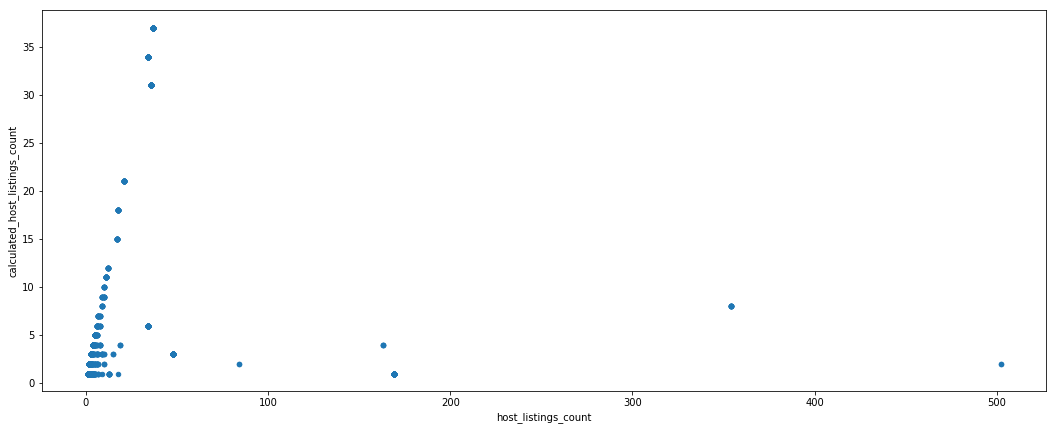

In [150]:
fig = plt.figure(figsize = (18,7))
ax = fig.gca()
l.plot.scatter('host_listings_count', 'calculated_host_listings_count', ax=ax)

It seems that calculated_host_listings_count is restricted to a narrower range of values than host_listings_count. There are several very large values for host_listings_count, whereas calculated_host_listings_count appears to be more stable.

Perhaps the calculated_host_listings_count column is a "cleaned" version of host_listings_count whereby erroneous or duplicate listings are removed from the caluclation.

Let's look at distributions of the rate columns: host_response_rate, host_acceptance_rate

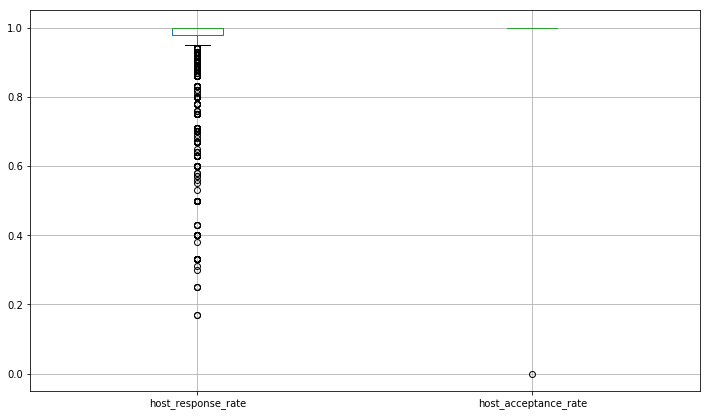

In [151]:
cols = ['host_response_rate', 'host_acceptance_rate']
df = l[cols].copy()

# Convert the percentage columns into floats
pct_to_float = lambda x: x.str.replace(r'%', r'.0').astype('float') / 100.0

# Apply the function to the rate cols
df = df.apply(pct_to_float, axis=1)

fig = plt.figure(figsize = (12,7))
ax = fig.gca()
df.boxplot(ax=ax)

In [152]:
df.describe()

,host_response_rate,host_acceptance_rate
count,3295.000000,3045.000000
mean,0.948868,0.999672
std,0.118667,0.018122
min,0.170000,0.000000
25%,0.980000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Both rate columns have values mostly close to 100%. Host_response_rate has a significantly larger standard deviation than host_acceptance_rate. Both columns are mostly not null.

In [153]:
l['host_acceptance_rate'].value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

In fact, there is only one non-null value for host_acceptance_rate that is not 100%.

Next, let's look into the boolean columns: host_is_superhost, host_has_profile_pic, host_identity_verified.

In [154]:
l['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [155]:
l['host_has_profile_pic'].value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

In [156]:
l['host_identity_verified'].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

Almost all hosts have profile pictures, whereas there is a more even split of host_is_superhost and host_identity-verified.

In [157]:
l['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

Host response time appears to be an ordinal variable indicating the time interval since a host last responded, in 4 discrete buckets. The time intervals are not in equal values.

Let's investigate another temporal feature: host_since

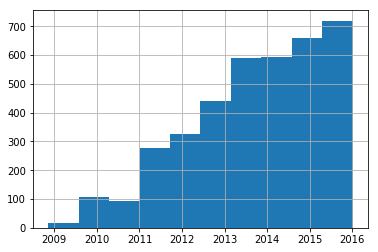

In [158]:
pd.to_datetime(l['host_since']).hist()

In [159]:
pd.to_datetime(l['host_since']).describe()

count                    3816
unique                   1380
top       2013-08-30 00:00:00
freq                       51
first     2008-11-10 00:00:00
last      2016-01-03 00:00:00
Name: host_since, dtype: object

The hosts in the dataset have been active on AirBnb in Seattle from a range of 2008 until 2016, which is presumably sometime not long before the dataset was generated.

In [160]:
l['host_neighbourhood'].value_counts()

Capitol Hill            405
Belltown                254
Ballard                 210
Minor                   191
Queen Anne              189
                       ... 
North College Park        1
Clairemont Mesa East      1
Northwest District        1
Santa Monica              1
Pinehurst                 1
Name: host_neighbourhood, Length: 102, dtype: int64

Host neighbourhood presumably indicates the neighbourhood that the host lives in. This seems to have values very similar to the neighbourhood and neighbourhood_cleansed. Also there are values such as "North Hollywood" which clearly reference locations outside of Seattle, which is of course possible.

Let's try to understand which of the neighbourhood columns host_neighbourhood is most similar to.

In [161]:
len(set(l['host_neighbourhood'].unique()).intersection(set(l['neighbourhood'].unique())))

80

In [162]:
len(set(l['host_neighbourhood'].unique()).intersection(set(l['neighbourhood_cleansed'].unique())))

70

The host_neighbourhood column overlaps with the neighbourhood column at a similar rate to the neighbourhood_cleansed column. It is difficult to say which metric it would be closest to. Also it is worth bearing in mind that there are neighbourhoods in other cities to Seattle that share the same as some of those in Seattle.

In [163]:
l['host_verifications'].unique()

array(["['email', 'phone', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",
       "['email', 'phone', 'google', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'linkedin', 'reviews', 'jumio']",
       "['email', 'reviews', 'kba']",
       "['email', 'phone', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'reviews']",
       "['phone', 'reviews']", "['phone']",
       "['email', 'phone', 'reviews']",
       "['email', 'phone', 'reviews', 'jumio', 'kba']",
       "['email', 'phone', 'facebook', 'google', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'reviews', 'jumio'

The host_verifications feature's values are arrays containing fixed names of platforms and other methods for verifiying the host, such as 'email', 'google' or 'linkedin'. It would make sense that hosts can be verified via multiple ways at once.

The remaining host features are: host_name, host_location and host_about. These are text-based fields which have complex properties and may not be easy to use for analysis.

#### Availability

* calendar_updated
* has_availability
* availability_30
* availability_60
* availability_90
* availability_365

In [164]:
cols = ['calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']
l[cols].head()

,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365
0,4 weeks ago,t,14,41,71,346
1,today,t,13,13,16,291
2,5 weeks ago,t,1,6,17,220
3,6 months ago,t,0,0,0,143
4,7 weeks ago,t,30,60,90,365


The availability feature group has the following integer columns: availability_30, availability_60, availability_90 and availability_365.

In [165]:
cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
l[cols].describe()

,availability_30,availability_60,availability_90,availability_365
count,3818.000000,3818.000000,3818.000000,3818.000000
mean,16.786276,36.814825,58.082504,244.772656
std,12.173637,23.337541,34.063845,126.772526
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,13.000000,28.000000,124.000000
50%,20.000000,46.000000,73.000000,308.000000
75%,30.000000,59.000000,89.000000,360.000000
max,30.000000,60.000000,90.000000,365.000000


It is not made clear but these columns appear to reference how many days that the given listing has vacant that can be booked, at the time that the data was scraped from AirBnb. These metrics would be taken within the time windows: the next 30 days, the next 60 days, the next 90 days, the next 365 days.

This is my interpretation of these metrics.

We can see that all metrics are completely filled in, and the mean, standard deviation, min, max, median and interquartile points appear to increase proportionally according to the number of days that the metric is considering as the time interval. 

By definition, the maximum value for each metric must be less than or equal to the time interval of the metric. This is observed for all metrics where we see for all of them the maximum value equals the time period length, e.g. max(availability_365) is 365.

There are also cases in all metrics where the availability is zero.

In [166]:
l['has_availability'].value_counts()

t    3818
Name: has_availability, dtype: int64

According to the has_availability column, there is availability for booking the listing on all listings. This appears to somewhat contradict that there are listings that are fully booked up for the next 365 days. However, using these definitions there could still be listings that have availability over a year from the time that the data was scraped.

Let's look at the distinct values for calendar_updated.

In [167]:
l['calendar_updated'].unique()

array(['4 weeks ago', 'today', '5 weeks ago', '6 months ago',
       '7 weeks ago', '2 weeks ago', 'yesterday', '5 months ago',
       'a week ago', '5 days ago', '3 days ago', '2 months ago',
       '3 months ago', '4 days ago', '2 days ago', '3 weeks ago',
       '1 week ago', '13 months ago', '6 weeks ago', '8 months ago',
       '12 months ago', '4 months ago', 'never', '6 days ago',
       '10 months ago', '14 months ago', '9 months ago', '7 months ago',
       '30 months ago', '11 months ago', '22 months ago', '16 months ago',
       '15 months ago', '17 months ago'], dtype=object)

We have 34 different values referencing time intervals in a human-readable format. Based on the naming of the column, I would assume that this means the time since the calendar was last updated, meaning when the host last updated the availability of the listing.

We have values such as 'today' and 'never' that would need to be adequately considered if converting this into a numerical feature.

In [168]:
l['calendar_updated'].isnull().sum()

0

We have no empty values for calendar_updated.

#### ID and system

* id
* listing_url
* scrape_id
* last_scraped
* thumbnail_url
* medium_url
* picture_url
* xl_picture_url
* host_id
* host_url
* host_thumbnail_url
* host_picture_url
* calendar_last_scraped


In [169]:
cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
        'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped']
l[cols].head()

,id,listing_url,scrape_id,last_scraped,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_thumbnail_url,host_picture_url,calendar_last_scraped
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,2016-01-04
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,2016-01-04
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,2016-01-04
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,2016-01-04
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,NaN,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...,NaN,1452570,https://www.airbnb.com/users/show/1452570,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,2016-01-04


The ID column appears to be the ID of the listing, and appears to be the same value as the last part of the listing_url which would be the URL for the listing. 

We have the host ID and the URL for the host's page on AirBnb in host_id and host_url.

There is a system ID to indicate which "scrape" instance this listing used in scrape_id. Some kind of web scraping script was likely used to generate this data.

The last_scraped column would appear to represent the date when the listing was scraped, and the calendar_last_scraped column appears to be the date the calendar was scraped.

In [170]:
pd.to_datetime(l['last_scraped']).value_counts()

2016-01-04    3818
Name: last_scraped, dtype: int64

In [171]:
pd.to_datetime(l['calendar_last_scraped']).value_counts()

2016-01-04    3818
Name: calendar_last_scraped, dtype: int64

It would seem that all the listings and their calendars were scraped January 4th 2016.

We also appear to have URLs for image files in: thumbnail_url, medium_url, picture_url, xl_picture_url, host_thumbnail_url and host_picture_url. The first 4 in this list would most likely be images related to the listing itself, whereas the final 2 in the list would most likely be images of the host or from their profile.

These images could be fetched and used for image-based analysis.

In [172]:
l[cols].isnull().sum() / l.shape[0]

id                       0.000000
listing_url              0.000000
scrape_id                0.000000
last_scraped             0.000000
thumbnail_url            0.083814
medium_url               0.083814
picture_url              0.000000
xl_picture_url           0.083814
host_id                  0.000000
host_url                 0.000000
host_thumbnail_url       0.000524
host_picture_url         0.000524
calendar_last_scraped    0.000000
dtype: float64

The image URL columns are the only columns that contain null values, with the maximum prevalence of nulls in the columns being 8.3%, by thumbnail_url, medium_url and xl_picture_url.

## Data preparation

In this section we will make the relevant changes to the data in order to prepare it to answer our 3 data mining questions:

1. Can we find an appropriate metric for understanding the quality of guests' experience?
2. How can we link listing attributes with the customer experiences?
3. What aspects of the listings can hosts easily alter to substantially boost the guest's experience?

### Optimising data for the response variable

Earlier on in the data understanding, we found a good combination of columns to use as the CX score, i.e.:

In [173]:
df = l.copy()

df['cx_score'] = df['review_scores_rating'] / 100 * df['reviews_per_month']

We have many neighbourhoods available in the Seattle dataset. Let's study the top 10 groups.

In [174]:
l['neighbourhood_cleansed'].value_counts()[:10]

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: neighbourhood_cleansed, dtype: int64

After some trial and error studying various neighbourhoods, we compare the distribution of review_scores_rating in the University District with the rest of the data in a violin plot.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


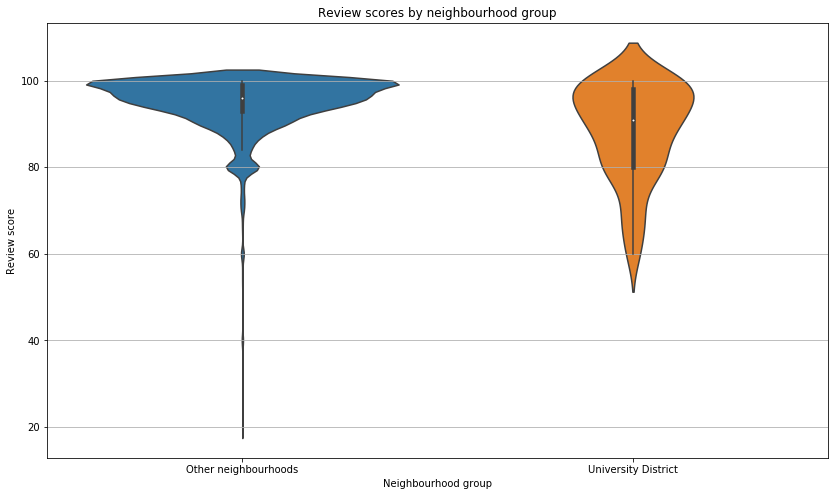

In [175]:
fontsize = 10

df_temp = l[['neighbourhood_group_cleansed', 'review_scores_rating']]
df_temp['n'] = np.where(
    df_temp['neighbourhood_group_cleansed'] == 'University District', 
    'University District', 'Other neighbourhoods'
)

fig, axes = plt.subplots(figsize=(14, 8))
sns.violinplot('n','review_scores_rating', data=df_temp, ax = axes)
axes.set_title('Review scores by neighbourhood group')

axes.yaxis.grid(True)
axes.set_xlabel('Neighbourhood group')
axes.set_ylabel('Review score')

plt.show()

The review scores for University District are much more spread out than the rest of the data, while having a smaller range. The median score is significantly lower for the University District than other neighbourhoods. It should be easier to predict review_scores_rating when subsetting the data to the University District.

Next, let's look at the other ingredient to CX score: reviews_per_month:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


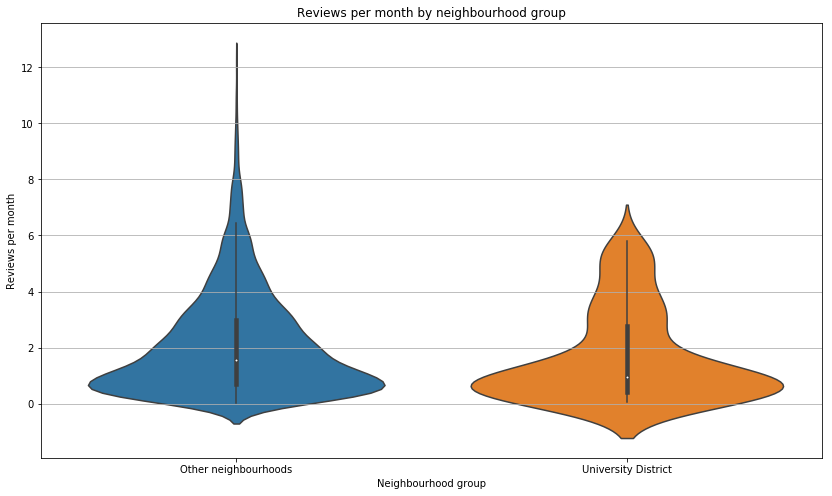

In [176]:
fontsize = 10

df_temp = l[['neighbourhood_group_cleansed', 'reviews_per_month']]
df_temp['n'] = np.where(
    df_temp['neighbourhood_group_cleansed'] == 'University District', 
    'University District', 'Other neighbourhoods'
)

fig, axes = plt.subplots(figsize=(14, 8))
sns.violinplot('n','reviews_per_month', data=df_temp, ax = axes)
axes.set_title('Reviews per month by neighbourhood group')

axes.yaxis.grid(True)
axes.set_xlabel('Neighbourhood group')
axes.set_ylabel('Reviews per month')

plt.show()

The reviews_per_month feature has a lower median value and smaller range for the University District than the other neighbourhoods, while exhibiting a similar spread of datapoints. Again, this subset of the data should make it easier to predict reviews_per_month.

Finally, let's look at the distribution of CX score by these neighbourhood splits:

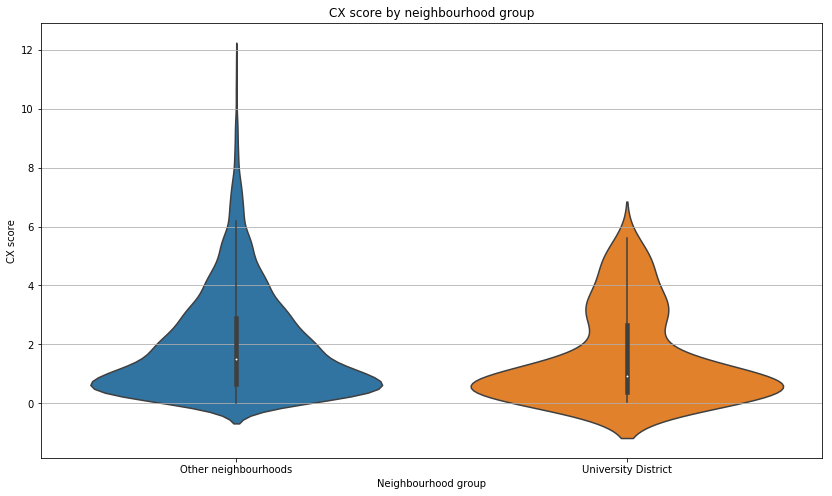

In [177]:
fontsize = 10

df_temp = l[['neighbourhood_group_cleansed', 'review_scores_rating', 'reviews_per_month']].copy()
df_temp['cx_score'] = df_temp['review_scores_rating'] / 100 * df_temp['reviews_per_month']
df_temp['n'] = np.where(
    df_temp['neighbourhood_group_cleansed'] == 'University District', 
    'University District', 'Other neighbourhoods'
)

fig, axes = plt.subplots(figsize=(14, 8))
sns.violinplot('n','cx_score', data=df_temp, ax = axes)
axes.set_title('CX score by neighbourhood group')

axes.yaxis.grid(True)
axes.set_xlabel('Neighbourhood group')
axes.set_ylabel('CX score')

plt.show()

The distribution for CX score in University District is quite similar in shape to the reviews_per_month distribution, with a slightly larger local maximum at roughly 3. The range of data is low compared with the other neighbourhoods, with a lower median and similar spread of data.

I am happy to proceed analysis just for the **University District only**.

In [178]:
df = l.copy()
df = df.loc[df['neighbourhood_group_cleansed'] == 'University District']
df['cx_score'] = df['review_scores_rating'] / 100 * df['reviews_per_month']

### Preparing data for predicting CX Score

We are now looking at the 2nd data mining question. The aim of this section is to perform feature engineering on our original dataset in order to create a dataset that is ready for applying a prediction algorithm, in order to accurately predict customer experience.

We will proceed in order of our feature groups.

#### Review-based datapoints

* number_of_reviews
* first_review
* last_review
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value
* reviews_per_month

Since we have established that our response variable depends on review_scores_rating and reviews_per_month, we must not use these two variables in our model since we would have data leakage, i.e. the answer is already given in the data.

We also established that there is a high correlation between most of the review_scores_ columns and review_scores_rating. For this reason we will exclude these features from the our dataset.

To ensure that we are careful to avoid further data leakage, we will just ignore all other review based columns.

In [179]:
df = df.drop(['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
             'review_scores_location', 'review_scores_value', 'reviews_per_month'], axis=1)

Let's ensure that our response variable cx_score has no empty values and drop any rows that contain null cx_score values.

In [180]:
df = df.dropna(subset=['cx_score'])

We will now run through the categorical and other non-numerical datatypes in order to engineer some features out of them. We will do this by feature group.

#### Attributes of property listed

* property_type
* room_type
* accommodates
* bathrooms
* bedrooms
* beds
* bed_type
* amenities
* square_feet

Let's start with the categorical variable property_type. We just want to keep the top 3 values and bucket the rest into an "Other" category, since the group size diminishes rapidly in size after that point.

Since it is also a categorical variable, we must convert this into a numerical format. We will use the pd.get_dummies() function to create new dummy columns one-hotting the categorical values. We will keep track of these new column names for future processing.

The conversion of this variable will be stored in a function convert_property_type. We will follow this process and naming convention for all feature transformations.

In [181]:
def convert_property_type(df):
    """
    Applies transformations to the property_type feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
            new_data.columns - the column names of the dummy variables
    """
    
    # Map the property type to the top 3 values and an Other bucket
    df['property_type'] = df['property_type'].map(
        {'House': 'House', 
         'Apartment': 'Apartment', 
         'Townhouse': 'Townhouse'}
    ).fillna('Other')
    
    # Create the dummy columns and append them to our dataframe
    new_data = pd.get_dummies(df[['property_type']])
    df[new_data.columns] = new_data
    
    # Remove the original categorical column
    df = df.drop(['property_type'], axis=1)
    
    return df, new_data.columns

The room_type column is already in a satisfactory number of values. Let's convert it using one-hot encoding.

In [182]:
def convert_room_type(df):
    """
    Applies transformations to the room_type feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
            new_data.columns - the column names of the dummy variables
    """
    # Create the dummy columns and append them to our dataframe
    new_data = pd.get_dummies(df[['room_type']])
    df[new_data.columns] = new_data
    
    # Remove the original categorical column
    df = df.drop(['room_type'], axis=1)
    
    return df, new_data.columns

We are just interested in real beds - all others don't really count.

In [183]:
def convert_bed_type(df):
    """
    Applies transformations to the bed_type feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # We just care about whether the bed is REAL
    df['real_bed'] = df['bed_type'].map({'Real bed': 1}).fillna(0)
    
    # Remove the original categorical column
    df = df.drop(['bed_type'], axis=1)
    
    return df

Now we're left with the amenities column. We will create columns for each of the tags and one-hot encode them.

In [184]:
def convert_amenities(df):
    """
    Applies transformations to the amenities feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Look for presence of the string within the amenities column
    df['amenities_tv'] = df['amenities'].str.contains('TV')
    df['amenities_internet'] = df['amenities'].str.contains('Internet')
    df['amenities_wireless_internet'] = df['amenities'].str.contains('Wireless Internet')
    df['amenities_cable_tv'] = df['amenities'].str.contains('Cable TV')
    df['amenities_kitchen'] = df['amenities'].str.contains('Kitchen')
    df['amenities_elevator_in_building'] = df['amenities'].str.contains('Elevator in Building')
    df['amenities_wheelchair_accessible'] = df['amenities'].str.contains('Wheelchair Accessible')
    df['amenities_smoke_detector'] = df['amenities'].str.contains('Smoke Detector')
    df['amenities_pool'] = df['amenities'].str.contains('Pool')
    df['amenities_free_parking_on_premises'] = df['amenities'].str.contains('Free Parking on Premises')
    df['amenities_air_conditioning'] = df['amenities'].str.contains('Air Conditioning')
    df['amenities_heating'] = df['amenities'].str.contains('Heating')
    df['amenities_pets_live_on_this_property'] = df['amenities'].str.contains('Pets live on this property')
    df['amenities_washer'] = df['amenities'].str.contains('Washer')
    df['amenities_breakfast'] = df['amenities'].str.contains('Breakfast')
    df['amenities_buzzer_wireless_intercom'] = df['amenities'].str.contains('Buzzer/Wireless Intercom')
    df['amenities_pets_allowed'] = df['amenities'].str.contains('Pets Allowed')
    df['amenities_carbon_monoxide_detector'] = df['amenities'].str.contains('Carbon Monoxide Detector')
    df['amenities_gym'] = df['amenities'].str.contains('Gym')
    df['amenities_dryer'] = df['amenities'].str.contains('Dryer')
    df['amenities_indoor_fireplace'] = df['amenities'].str.contains('Indoor Fireplace')
    df['amenities_family_kid_friendly'] = df['amenities'].str.contains('Family/Kid Friendly')
    df['amenities_dogs'] = df['amenities'].str.contains('Dog(s)')
    df['amenities_essentials'] = df['amenities'].str.contains('Essentials')
    df['amenities_cats'] = df['amenities'].str.contains('Cat(s)')
    df['amenities_hot_tub'] = df['amenities'].str.contains('Hot Tub')
    df['amenities_shampoo'] = df['amenities'].str.contains('Shampoo')
    df['amenities_first_aid_kit'] = df['amenities'].str.contains('First Aid Kit')
    df['amenities_smoking_allowed'] = df['amenities'].str.contains('Smoking Allowed')
    df['amenities_fire_extinguisher'] = df['amenities'].str.contains('Fire Extinguisher')
    df['amenities_doorman'] = df['amenities'].str.contains('Doorman')
    df['amenities_washer_dryer'] = df['amenities'].str.contains('Washer / Dryer')
    df['amenities_safety_card'] = df['amenities'].str.contains('Safety Card')
    df['amenities_suitable_for_events'] = df['amenities'].str.contains('Suitable for Events')
    df['amenities_other_pets'] = df['amenities'].str.contains('Other pet(s)')
    df['amenities_24_hour_check_in'] = df['amenities'].str.contains('24-Hour Check-in')
    df['amenities_hangers'] = df['amenities'].str.contains('Hangers')
    df['amenities_laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop Friendly Workspace')
    df['amenities_iron'] = df['amenities'].str.contains('Iron')
    df['amenities_hair_dryer'] = df['amenities'].str.contains('Hair Dryer')
    df['amenities_lock_on_bedroom_door'] = df['amenities'].str.contains('Lock on Bedroom Door')
    
    # Remove the original categorical column
    df = df.drop(['amenities'], axis=1)
    
    return df

#### Geolocation

* street
* neighbourhood
* neighbourhood_cleansed
* neighbourhood_group_cleansed
* city
* state
* zipcode
* market
* smart_location
* country_code
* country
* latitude
* longitude
* is_location_exact
* jurisdiction_names

In [185]:
df = df.drop(['street', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code',
             'country', 'latitude', 'longitude', 'jurisdiction_names'], axis=1)

Only the neighbourhood columns and is_location_exact will be used as they are of the correct granularity.

In [186]:
def convert_neighbourhood_cleansed(df):
    """
    Applies transformations to the neighbourhood_cleansed feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
            new_data.columns - the column names of the dummy variables
    """
    
    # Create dummies on the column
    new_data = pd.get_dummies(df[['neighbourhood_cleansed']])
    df[new_data.columns] = new_data
    
    # We will keep the neighbourhood_cleansed column for future use
    return df, new_data.columns

In [187]:
def convert_neighbourhood_group_cleansed(df):
    """
    Applies transformations to the neighbourhood_group_cleansed feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
            new_data.columns - the column names of the dummy variables
    """
    
    # Create dummies on the column
    new_data = pd.get_dummies(df[['neighbourhood_group_cleansed']])
    df[new_data.columns] = new_data
    
    # We will keep the neighbourhood_cleansed column for future use
    return df, new_data.columns

In [188]:
def convert_is_location_exact(df):
    """
    Input: df - a dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['is_location_exact'] = df['is_location_exact'].map({'t':1}).fillna(0)
    
    return df

We simply dummied the neighbourhood_cleansed and neighbourhood_group_cleansed, and converted is_location_exact from a boolean to a binary.

#### Policies

* price
* weekly_price
* monthly_price
* security_deposit
* cleaning_fee
* guests_included
* extra_people
* minimum_nights
* maximum_nights
* requires_license
* license
* instant_bookable
* require_guest_profile_picture
* require_guest_phone_verification
* cancellation_policy

Having a weekly price is an optional feature for a host. Also the multiplicative factor of the price to the weekly price is something that will vary.

We can create these 2 features from the weekly price, and also all other money-based columns (except price).

In [189]:
def convert_price(df):
    """
    Applies transformations to the price feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert the money variable into a numeric variable
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    return df

We found earlier that price does not have any null values, however weekly_price, monthly_price, security_deposit and cleaning_fee do, so let's be mindful of that when creating features from them. 

In [190]:
def convert_weekly_price(df):
    """
    Applies transformations to the weekly_price feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert the money variable into a numeric variable
    df['weekly_price'] = df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Note that this code is assuming that price has already been converted
    # so we will run this code after convert_price().
    df['weekly_price_ratio'] = df['weekly_price'] / df['price']
        
    # Boolean feature to indicate that a weekly price has been set
    df['has_weekly_price'] = ~df['weekly_price'].isnull()
    
    # If there is no weekly price then set the ratio to 7, since
    # this would imply the regular price
    df['weekly_price_ratio'] = df['weekly_price_ratio'].fillna(7)
    df['weekly_price'] = df['weekly_price'].fillna(7*df['price'])
    
    return df

In [191]:
def convert_monthly_price(df):
    """
    Applies transformations to the weekly_price feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert the money variable into a numeric variable
    df['monthly_price'] = df['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Note that this code is assuming that price has already been converted
    # so we will run this code after convert_price().
    df['monthly_price_ratio'] = df['monthly_price'] / df['price']
        
    # Boolean feature to indicate that a weekly price has been set
    df['has_monthly_price'] = ~df['monthly_price'].isnull()
    
    # If there is no monthly price then set the ratio to 365/12, since 
    # this would imply the regular price.
    df['monthly_price_ratio'] = df['monthly_price_ratio'].fillna(365./12.)
    df['monthly_price'] = df['monthly_price'].fillna(365./12.*df['price'])
    
    return df

In [192]:
def convert_security_deposit(df):
    """
    Applies transformations to the security_deposit feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert the money variable into a numeric variable
    df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
    
    # Note that this code is assuming that price has already been converted
    # so we will run this code after convert_price().
    df['security_deposit_ratio'] = df['security_deposit'] / df['price']
        
    # Boolean feature to indicate that a weekly price has been set
    df['has_security_deposit'] = ~df['security_deposit'].isnull()
    
    # If there is no security_deposit then set the ratio to zero
    # This assumes that there is no security deposit
    df['security_deposit_ratio'] = df['security_deposit_ratio'].fillna(0)
    df['security_deposit'] = df['security_deposit'].fillna(0)
    
    return df

In [193]:
def convert_cleaning_fee(df):
    """
    Applies transformations to the cleaning_fee feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert the money variable into a numeric variable
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
    
    # Note that this code is assuming that price has already been converted
    # so we will run this code after convert_price().
    df['cleaning_fee_ratio'] = df['cleaning_fee'] / df['price']
    
    # Convert the money variable into a numeric variable
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
    
    # If there is no cleaning_fee then set the ratio to zero
    # This assumes that there is no cleaning fee
    df['cleaning_fee_ratio'] = df['cleaning_fee_ratio'].fillna(0)
    df['cleaning_fee'] = df['cleaning_fee'].fillna(0)
    
    return df

In [194]:
def convert_extra_people(df):
    """
    Applies transformations to the extra_people feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert the money variable into a numeric variable
    df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
    
    # Note that this code is assuming that price has already been converted
    # so we will run this code after convert_price().
    df['extra_people_ratio'] = df['extra_people'] / df['price']
    
    # Convert the money variable into a numeric variable
    df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
    
    # If there is no extra_people then set the ratio to zero
    # This assumes that there is no extra people fee
    df['extra_people_ratio'] = df['extra_people_ratio'].fillna(0)
    df['extra_people'] = df['extra_people'].fillna(0)
    
    return df

Minimum nights and maximum nights non-null integers, so these don't require any engineering. The requires_license, instant_bookable, require_guest_profile_picture and require_guest_phone_verification are boolean features, so we'll convert them to integers.

However, requires_license is fully 'f' so we won't use this one. Also, license is entirely null so we won't use that.

Also, cancellation_policy we will just dummify since it is a categorical with just 3 features, so it won't increase dimensionality too much.

In [195]:
df = df.drop(['requires_license', 'license'], axis=1)

In [196]:
def convert_instant_bookable(df):
    """
    Applies transformations to the instant_bookable feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['instant_bookable'] = df['instant_bookable'].map({'t': 1}).fillna(0)
    
    return df

In [197]:
def convert_require_guest_profile_picture(df):
    """
    Applies transformations to the require_guest_profile_picture feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['require_guest_profile_picture'] = df['require_guest_profile_picture'].map({'t': 1}).fillna(0)
    
    return df

In [198]:
def convert_require_guest_phone_verification(df):
    """
    Applies transformations to the require_guest_phone_verification feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['require_guest_phone_verification'] = df['require_guest_phone_verification'].map({'t': 1}).fillna(0)
    
    return df

In [199]:
def convert_cancellation_policy(df):
    """
    Applies transformations to the cancellation_policy feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
            new_data.columns - the column names of the dummy variables
    """
    
    # Create dummies on the column
    new_data = pd.get_dummies(df[['cancellation_policy']])
    df[new_data.columns] = new_data
    
    # We will keep the cancellation_policy column for future use
    df = df.drop(['cancellation_policy'], axis=1)
    
    return df, new_data.columns

#### Descriptive

* name
* summary
* space
* description
* experiences_offered
* neighborhood_overview
* notes
* transit

We won't be making use of any of the descriptive columns in this analysis as it is judged to be too complex for the potential value-add.

In [200]:
df = df.drop(['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
             'notes', 'transit'], axis=1)

#### Attributes of the host

* host_name
* host_since
* host_location
* host_about
* host_response_time
* host_response_rate
* host_acceptance_rate
* host_is_superhost
* host_neighbourhood
* host_listings_count
* host_total_listings_count
* host_verifications
* host_has_profile_pic
* host_identity_verified
* calculated_host_listings_count

We won't be using the host_name column since it should be mostly irrelevant from a business standpoint. We also won't use the host_acceptance_rate column as it's not variable enough. Based on prior analysis, we will use calculated_host_listings_count and not host_listings_count and host_total_listings_count.

In [201]:
df = df.drop(['host_name', 'host_acceptance_rate', 'host_total_listings_count'], axis=1)

We will only check for existence of a host_about, creating a dummy variable from whether it is null.

In [202]:
def convert_host_about(df):
    """
    Applies transformations to the host_about feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Ascertain whether the value is null
    df['has_host_about'] = ~df['host_about'].isnull()
    
    # Drop the original column
    df = df.drop(['host_about'], axis=1)
    
    return df

From the host_since date column, we can engineer the number of days as host as a numeric column. We will also use the last_scraped as the reference point, since the data is valid from that date and not the present date.

In [203]:
def convert_host_since(df):
    """
    Applies transformations to the host_since feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Subtract the dates to get the number of days
    df['days_as_host'] = (pd.to_datetime(df['last_scraped']) - pd.to_datetime(df['host_since'])) / np.timedelta64(1, 'D')
    
    # Drop the original column
    df = df.drop(['host_since', 'last_scraped'], axis=1)
    
    return df

We will use the host_location field to ascertain whether they are in Seattle.

In [204]:
def convert_host_location(df):
    """
    Applies transformations to the host_location feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """

    # Search for 'Seattle' in the host_location field
    df['host_in_seattle'] = df['host_location'].str.contains('Seattle')
    
    # Drop the original column
    df = df.drop(['host_location'], axis=1)
    
    return df

Let's map the 4 distinct values of the ordinal nominal variable host_response_time to the 4 levels.

In [205]:
def convert_host_response_time(df):
    """
    Applies transformations to the host_response_time feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """

    # Map the values
    df['host_response_time'] = df['host_response_time'].map(
        {'within an hour': 1, 'within a few hours': 2, 'within a day': 3}
    ).fillna(4)
    
    return df

We process the host_response_rate column by converting it into a float between 0 and 1 and then filling missing values with zero to imply that they do not reply.

In [206]:
def convert_host_response_rate(df):
    """
    Applies transformations to the host_response_rate feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Convert to float
    df['host_response_rate'] = df['host_response_rate'].str.replace(r'%', r'.0').astype('float') / 100.0
    
    # Fill missing values with zero
    df['host_response_rate'] = df['host_response_rate'].fillna(0)
    
    return df

We will lookup the host's neighbourhood in the neighbourhood columns to ascertain whether they live in the listing property's neighbourhood.

In [207]:
def convert_host_neighbourhood(df):
    """
    Applies transformations to the host_neighbourhood feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Lookup against all 3 neighbourhood columns
    df['host_in_neighbourhood'] = np.where(
        df['host_neighbourhood'] == df['neighbourhood'], True, 
        np.where(
            df['host_neighbourhood'] == df['neighbourhood_cleansed'], True,
            np.where(
                df['host_neighbourhood'] == df['neighbourhood_group_cleansed'], True, False
            )
        )
    )
    
    # Remove the original columns
    df = df.drop(['host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'], axis=1)
    
    return df

We will extract the individual sub-values of the verifications column as their own columns.

In [208]:
def convert_host_verifications(df):
    """
    Applies transformations to the host_verifications feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    # Lookup the substring and set boolean value as column
    df['host_verif_email'] = df['host_verifications'].str.contains('email')
    df['host_verif_kba'] = df['host_verifications'].str.contains('kba')
    df['host_verif_phone'] = df['host_verifications'].str.contains('phone')
    df['host_verif_reviews'] = df['host_verifications'].str.contains('reviews')
    df['host_verif_jumio'] = df['host_verifications'].str.contains('jumio')
    df['host_verif_facebook'] = df['host_verifications'].str.contains('facebook')
    df['host_verif_linkedin'] = df['host_verifications'].str.contains('linkedin')
    df['host_verif_google'] = df['host_verifications'].str.contains('google')
    df['host_verif_manual_online'] = df['host_verifications'].str.contains('manual_online')
    df['host_verif_manual_offline'] = df['host_verifications'].str.contains('manual_offline')
    df['host_verif_sent_id'] = df['host_verifications'].str.contains('sent_id')
    df['host_verif_amex'] = df['host_verifications'].str.contains('amex')
    df['host_verif_weibo'] = df['host_verifications'].str.contains('weibo')
    df['host_verif_photographer'] = df['host_verifications'].str.contains('photographer')
    
    # Drop the original column
    df = df.drop(['host_verifications'], axis=1)
    
    return df

The host_is_superhost is just a 't/f' column and we'll map this to a boolean.

In [209]:
def convert_host_is_superhost(df):
    """
    Applies transformations to the host_is_superhost feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1}).fillna(0)
    
    return df

We'll map the other 2 boolean columns in the same way.

In [210]:
def convert_host_has_profile_pic(df):
    """
    Applies transformations to the host_has_profile_pic feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1}).fillna(0)
    
    return df

In [211]:
def convert_host_identity_verified(df):
    """
    Applies transformations to the host_is_superhost feature of the dataset.
    
    Input: df - the AirBnb Seattle dataset containing the unprocessed column's data
    Output: df - the modified dataset containing the transformed features
    """
    
    df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1}).fillna(0)
    
    return df

#### Availability

* calendar_updated
* has_availability
* availability_30
* availability_60
* availability_90
* availability_365

Since the availability columns are a function of how many users are booking the listings on this platform, there is the potential for data leakage when considering these columns for predicting CX score, which depends on review velocity. We won't consider any of the availability columns.

In [212]:
df = df.drop(['calendar_updated', 'has_availability', 'availability_30', 'availability_60',
             'availability_90', 'availability_365'], axis=1)

#### ID and system

* id
* listing_url
* scrape_id
* last_scraped
* thumbnail_url
* medium_url
* picture_url
* xl_picture_url
* host_id
* host_url
* host_thumbnail_url
* host_picture_url
* calendar_last_scraped

The ID and system columns are not required for analysis, but we will ensure that the data has index set to the internal 'id' field, so that we can keep track of which records are being used.

In [213]:
df = df.set_index('id')

In [214]:
df = df.drop(['listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
              'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped'], axis=1)

We have not yet dropped the 'last_scraped' column, as it will be used for the convert_host_since function.

### Applying the transformations

Let's look at the columns we have in our df dataframe.

In [215]:
df.columns

Index(['last_scraped', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'cx_score'],
      dtype='object')

This is a much narrower dataset than before since we have removed all the columns that won't provide us with useful features.

In [216]:
df.shape

(96, 40)

Also, since we have filtered the data to the University District, we have much fewer records than before. 

Currently, the number of columns is significantly less than the number of rows, so we may not run into dimensionality problems.

Let's check to see if any of our columns are completely null for the subset of data (University District) that we are considering, so that we can remove those.

In [217]:
df.columns[df.isnull().sum() / df.shape[0] == 1]

Index(['square_feet'], dtype='object')

The square_feet column has no non-null values, so we will remove this column.

In [218]:
df = df.drop(['square_feet'], axis=1)

Let's apply the data transformation functions in order and assess the fully preprocessed data. Firstly, we'll apply the conversion functions that create dummy variables, so that we can store and reference the new variable names later.

In [219]:
# dummies
df, cols_neighbourhood_cleansed = convert_neighbourhood_cleansed(df)
df, cols_neighbourhood_group_cleansed = convert_neighbourhood_group_cleansed(df)
df, cols_property_type = convert_property_type(df)
df, cols_cancellation_policy = convert_cancellation_policy(df)
df, cols_room_type = convert_room_type(df)

cols_dummies = []
cols_dummies.extend(cols_neighbourhood_cleansed)
cols_dummies.extend(cols_neighbourhood_group_cleansed)
cols_dummies.extend(cols_property_type)
cols_dummies.extend(cols_cancellation_policy)
cols_dummies.extend(cols_room_type)

In [220]:
cols_dummies

['neighbourhood_cleansed_University District',
 'neighbourhood_group_cleansed_University District',
 'property_type_Apartment',
 'property_type_House',
 'property_type_Other',
 'property_type_Townhouse',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

The new columns conform with our expectations for what they should be.

Now, let's apply the conversions for the other columns.

In [221]:
# map columns to new variables
df = convert_host_since(df)
df = convert_host_location(df)
df = convert_host_about(df)
df = convert_host_response_time(df)
df = convert_host_response_rate(df)
df = convert_host_neighbourhood(df)
df = convert_host_verifications(df)
df = convert_host_has_profile_pic(df)
df = convert_host_identity_verified(df)
df = convert_bed_type(df)
df = convert_amenities(df)
df = convert_price(df)
df = convert_weekly_price(df)
df = convert_monthly_price(df)
df = convert_security_deposit(df)
df = convert_cleaning_fee(df)
df = convert_extra_people(df)
df = convert_instant_bookable(df)
df = convert_require_guest_profile_picture(df)
df = convert_require_guest_phone_verification(df)
df = convert_host_is_superhost(df)
df = convert_is_location_exact(df)

/opt/conda/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


We have applied all of the feature engineering functions to the dataset. Let's see what its shape is now.

In [222]:
df.shape

(96, 105)

Having applied the feature conversion, we now have a few more columns than rows, so we may run into dimensionality issues with certain algorithms because some cannot handle more columns than rows in the data.

## Modeling

Now the dataset is ready for running a model, we can focus on optimizing models to predict the response variable **CX Score**. To clarify, we are attempting to answer the data mining question: "How can we link listing attributes with the customer experiences?".

Let's see whether we can reduce the amount of features in the dataset by looking at the correlation with the response variable.

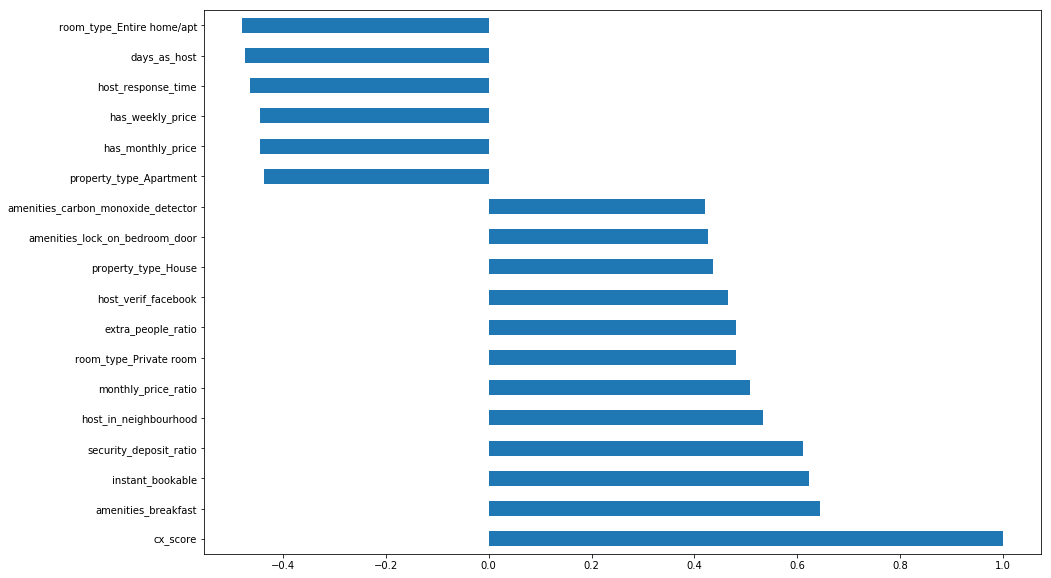

In [223]:
# Get a correlation matrix
corr = df.corr()

# Look at variables correlating with our response variable
corr_y = corr['cx_score']

# Plot a horizontal bar chart of the features with > 0.4 correlation (either positive or negative)
fontsize = 10
plt.figure(figsize=(15,10))
corr_y[np.abs(corr_y) > 0.4].sort_values(ascending=False).plot.barh()

We can see that we have 18 features that correlate with CX Score with magnitude greater than 0.4 (except CX Score itself). 

The top 5 negatively correlating features are:

* Room type is "Entire home or apartment"
* Days as host
* Host response time
* If there is a weekly price
* If there is a monthly price

Since over 50% of listings have room type as "Entire home/apt", it may not be so easy to draw the conclusion that this feature is highly responsible for worsened CX Score. The other values for this feature are "Private room" and "Shared room".

It makes sense that host response time would be negatively correlated with good customer experience, since it would be inconvenient for a guest to wait longer for a host to respond to their queries.

The top 5 positively correlating features are:

* Breakfast amenities
* Instant bookable
* Ratio of security deposit to the price
* Whether the host is located in the neighbourhood
* The ratio of the monthly deposit to the price

It makes sense that the breakfast amenities is correlated positively with good customer experience, since having the breakfast included in the listing would be very convenient for guests.

Also, being able to book the listing instantly rather than having to wait would seem to be a nice feature to have, so it makes sense that this is positively correlated with CX score.

Let's take only the features that have a magnitude of at least 0.45 correlation with the response variable.

In [224]:
df = df[corr_y[np.abs(corr_y) > 0.45].index.values]
df2.shape

NameError: name 'df2' is not defined

This is done because it is unlikely that features with a low correlation with the response variable will produce a measurable effect on the response variable.

We are left with 12 columns from 96 rows after having done this, so we should be avoiding dimensionality issues now.

Let's prepare the train and test splits of the data.

In [ ]:
from sklearn.model_selection import train_test_split

# Train and test datasets
train, test = train_test_split(df, test_size=0.3, random_state=0)

# We separate out the response variable from the other variables
X_train = train.drop(['cx_score'], axis=1)
y_train = train['cx_score']

X_test = test.drop(['cx_score'], axis=1)
y_test = test['cx_score']

We have held out 30% of the data for testing the model.

Let's try an Ordinary Least Squares regression model on this data and see what the R squared result is for the training data.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
y_train_preds = ols.predict(X_train)
r2_score(y_train, y_train_preds)

This is a very strong result from our experiment on the training data. Let's see what the RMSE was for this data.

In [ ]:
np.sqrt(mean_squared_error(y_train, y_train_preds))

Let's compare these results when the same model is applied to the training data.

In [ ]:
y_test_preds = ols.predict(X_test)
r2_score(y_test, y_test_preds)

This R squared score is quite low. Let's see what the RMSE is on the test dataset.

In [ ]:
np.sqrt(mean_squared_error(y_test, y_test_preds))

The RMSE is higher for the test data than the training data.

We have established that while the model performed on the training set very well, the results were not good when run on "new" test data. This indicates that the model may be overfitting the data.

Let's try the Ridge Regression algorithm on the data, using 6-fold cross-validation.

In [ ]:
from sklearn.linear_model import RidgeCV

reg = RidgeCV(cv=6)
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

* We have a reasonable score of 0.78 for the R squared score on the training data using this approach. Let's see the RMSE for the training data.

In [ ]:
y_train_preds = reg.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_preds))

We have quite a low RMSE using this model, which is also a good result. Now, let's assess these metrics on the test dataset.

In [ ]:
reg.score(X_test, y_test)

This result is not the strongest result, but it is at least an improvement on OLS.

In [ ]:
y_test_preds = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_preds))

The RMSE is at least somewhat lower than when using OLS.

While these results are not conclusive, at least we have some confidence that the independent variables affect the response variable in the model, albeit to most likely a small degree.

We can now provide an answer to our second data mining question:

From running a ridge regression model, we were able to ascertain a moderate association between listing attributes and the customer experience.

## Evaluation

Since we have now tested our model and improved upon it, let's see how we can use it to address our business needs.

### Feature importance

Let's attempt to understand whether we can answer the final data mining question: "What aspects of the listings can hosts easily alter to substantially boost the guest's experience?"

For this, we can look at the coefficients of our linear model. This will give us the feature importance.

In [ ]:
coefs = pd.DataFrame(reg.coef_, index=X_train.columns)
coefs.columns = ['Coefficient']
coefs.sort_values(by=['Coefficient'], ascending=False).head(5)

Above are the top 5 positive coefficients and their variables from the model. Some interesting points from this would be:

* It appears that being verified on Facebook contributes well to the CX score
* Having the instant bookable feature enabled is associated with high CX score
* Providing breakfast is associated with high CX score

In [ ]:
coefs.sort_values(by=['Coefficient'], ascending=True).head(5)

The only significantly negative coefficient belongs to host response time. In other words, longer host response times is associated with poor CX score.

### Conclusions

Having gone through the data mining process with the AirBnb Seattle dataset, performing exploratory analysis, ascertaining a response variable, fitting a model to predict CX score, and understanding feature importance, we can provide some conclusions to our business goals. To reiterate, our business goal from this exercise was to find ways that hosts can improve the guests' experiences.

We have broken this into the 3 data mining questions that have guided us to this:

#### 1. Can we find an appropriate metric for understanding the quality of guests' experience?

We did exploratory analysis to discover the array of review-based metrics and understand which of them could be contenders for a CX score. We found that CX score can be well posed as a "velocity of good reviews", calculated using the reviews_per_month and review_scores_rating columns. We understood that better results would be achieved at this stage by narrowing the scope to just the University District neighbourhood.

We found a reasonable metric for understanding customer experience.

Going forward, AirBnb Seattle could expand on this insight to create a more robust CX score metric that can be adapted throughout all Seattle neighbourhoods. Once this is acheieved and it can be used for more accurate predictions, it could be compared with the AirBnb Boston dataset for further improvements and generalisations.


#### 2. How can we link listing attributes with the customer experiences?

We underwent a lot of data understanding and preparation of the features. By grouping the features into business-informed feature groups, we were able to analyze and interpret the source data more easily and follow a robust process of feature engineering. We were able to then use this cleaned dataset and the new CX Score variable to predict CX score.

We ultimately found that we could to a moderate degree link listing attributes with the customer experience.

While the performance of the final model was not strong, it was a promising start, and I would like to do further feature engineering and modelling to optimise and improve on the model.

#### 3. What aspects of the listings can hosts easily alter to substantially boost the guest's experience?

Utilising the model that we had just developed, it was quite simple to find the most important features contributing to the CX score by taking coefficients of the linear model.

We could recommend a strategy for hosts in the University District by incentivising them to:

* Become verified on Facebook
* Enable the 'instant bookable' feature
* Provide breakfast
* Respond faster to guests

Going forward we could put this plan into action and measure whether the recommendations had any effect on the overall CX score.
